In [1]:
import os, platform

torch_device = 'cpu'

if 'kaggle' in os.environ.get('KAGGLE_URL_BASE', 'localhost'):
    torch_device = 'cuda'
else:
    torch_device = 'mps' if platform.system() == 'Darwin' else 'cpu'

In [2]:
torch_device

'cuda'

In [3]:
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

In [4]:
!pip install --upgrade git+https://github.com/huggingface/diffusers.git

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-mz9ewjpm
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-mz9ewjpm
  Resolved https://github.com/huggingface/diffusers.git to commit 7a91ea6c2b53f94da930a61ed571364022b21044
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.18.0.dev0-py3-none-any.whl size=1248390 sha256=585b011a963988d92eeba5e80ad1d6485b57deb62a0b0a9c592a9f107529a02a
  Stored in directory: /tmp/pip-ephem-wheel-cache-56t2eopn/wheels/4d/b7/a8/6f9549ceec5daad78675b857ac57d697c387062506520a7b50
Successfully built diffusers


In [5]:
!pip install transformers scipy ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.2 MB/s eta 0:00:00


In [6]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

repo_id = 'stabilityai/stable-diffusion-2-1'
pipe = StableDiffusionPipeline.from_pretrained(repo_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

0it [00:00, ?it/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

In [7]:
pipe = pipe.to(torch_device)

  0%|          | 0/50 [00:00<?, ?it/s]

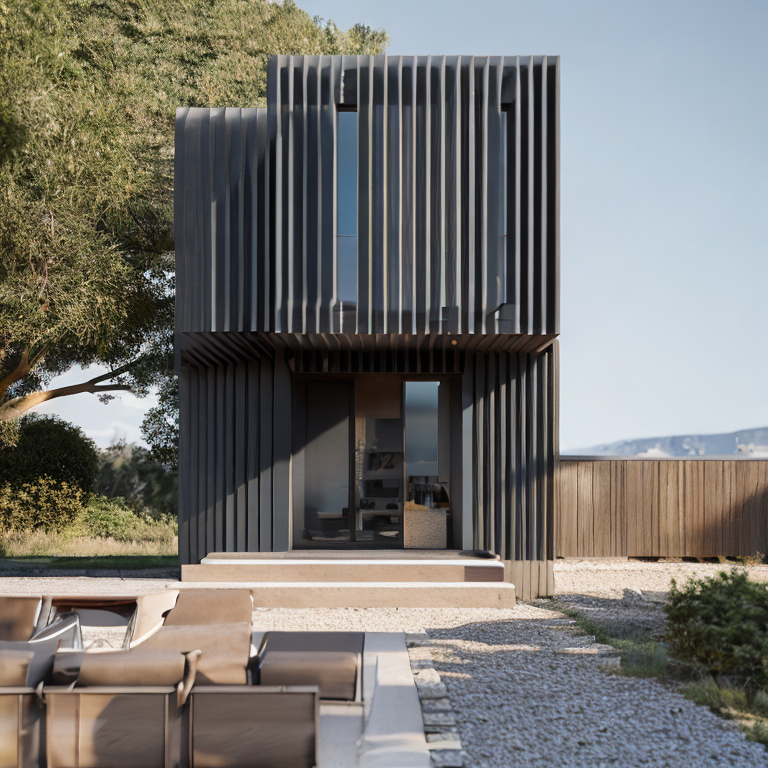

In [8]:
prompt ='house, shot 35 mm, realism, octane render, 8k, trending on artstation, 35 mm camera, unreal engine, hyper detailed, photo - realistic maximum detail, volumetric light, realistic matte painting, hyper photorealistic, trending on artstation, ultra - detailed, realistic'
negative_prompt='BadDream, (UnrealisticDream:1.3)'

image = pipe(prompt=prompt, negative_prompt=negative_prompt).images[0] # image here is in [PIL format](https://pillow.readthedocs.io/en/satble/)

# Now to display an image you can either save it such as:
image

  0%|          | 0/50 [00:00<?, ?it/s]

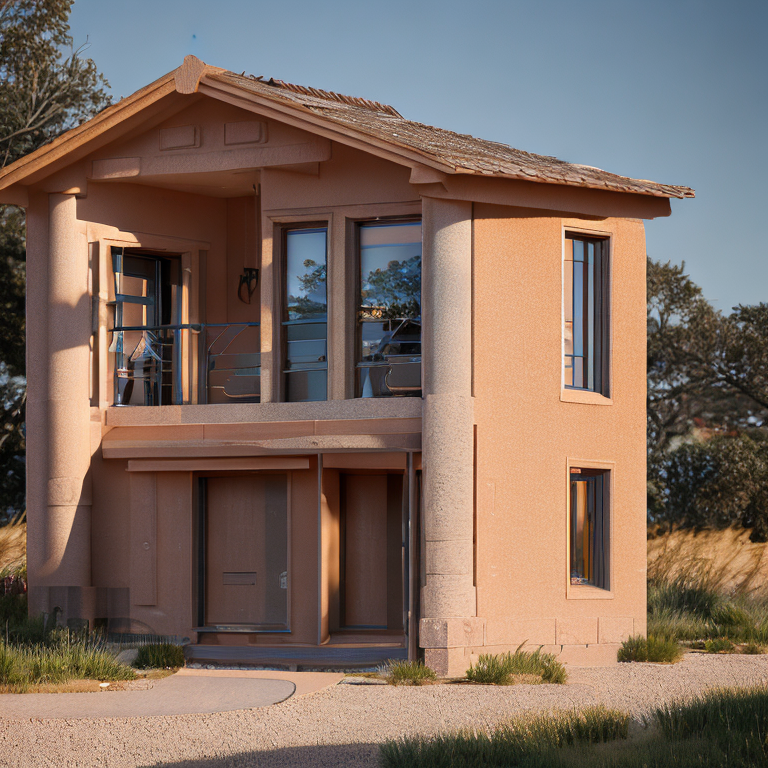

In [9]:
import torch

generator = torch.Generator(torch_device).manual_seed(5775709)

image = pipe(prompt=prompt,negative_prompt=negative_prompt, generator=generator).images[0]

image

  0%|          | 0/30 [00:00<?, ?it/s]

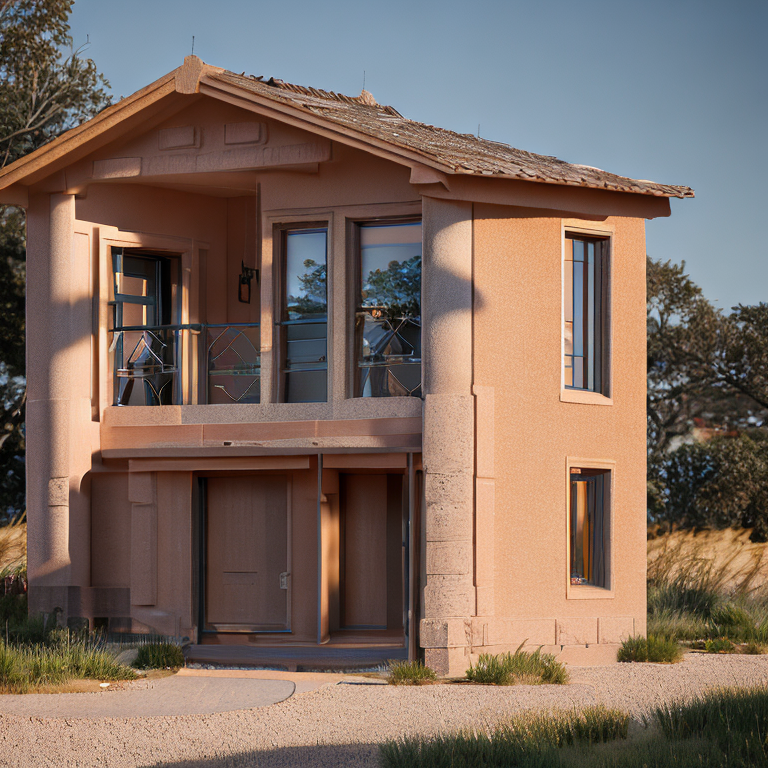

In [10]:
import torch

generator = torch.Generator(torch_device).manual_seed(5775709)

image = pipe(prompt=prompt, negative_prompt=negative_prompt, num_inference_steps=30, generator=generator).images[0]

image

In [11]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

  0%|          | 0/50 [00:00<?, ?it/s]

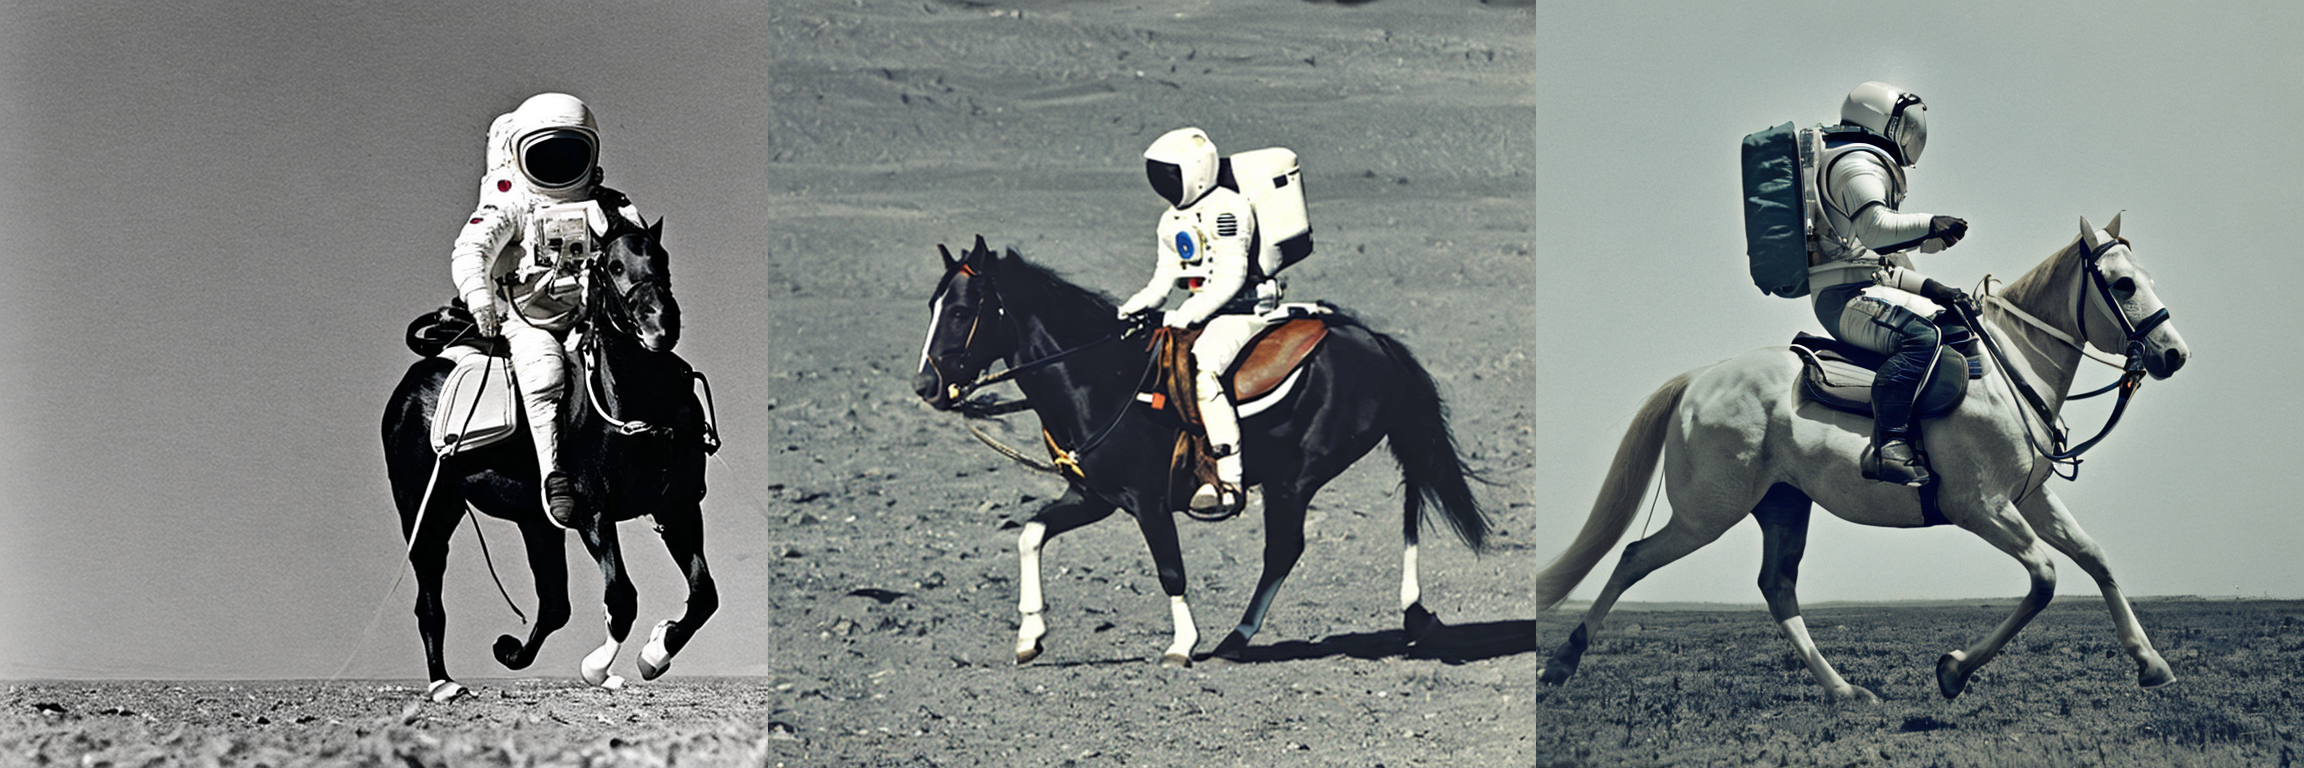

In [12]:
num_images =3
prompt1 = ["a photograph of an astronaut riding a horse"] * num_images

images = pipe(prompt1).images

grid = image_grid(images, rows=1, cols=3)
grid

  0%|          | 0/30 [00:00<?, ?it/s]

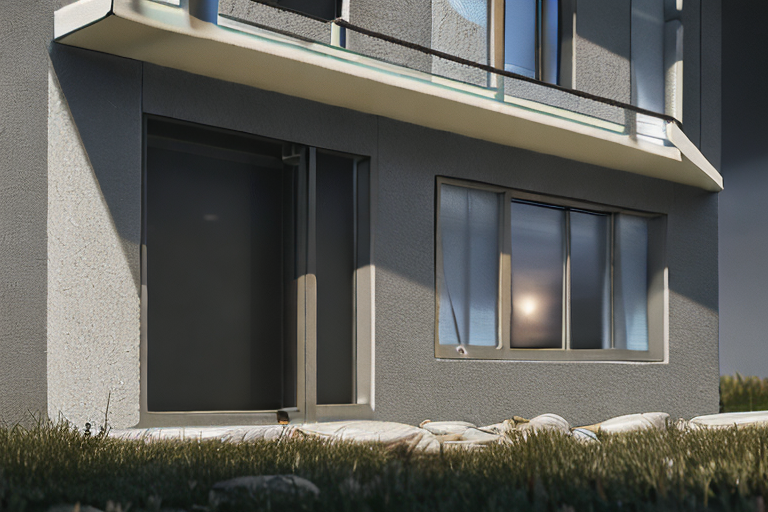

In [13]:
image = pipe(prompt=prompt, num_inference_steps=30, generator=generator, height=512, width=768).images[0]
image